In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib notebook

import os

import pandas as pd

from colinAnalysis import bAnalysis2
from colinAnalysis import colinAnalysis2


## Test bAnalysis2

In [2]:
path = '/media/cudmore/data/colin/21n10003.abf'
path = '/Users/cudmore/data/colin/21n10003.abf'
ba2 = bAnalysis2(path)
print(ba2)

21n10003.abf sweeps:1 dur(s):83.0 kHz:10 events:None


In [3]:
detection = bAnalysis2.getDefaultDetection()
#detection['xRange'] = [20,50]
ba2.detect(detection)
print(f'num peaks {ba2.numPeaks}')
display(ba2.analysisDf.head())

PERFORMING BASELINE
num peaks 511


,index,file,condition,genotype,sex,accept,userType,DAC0,peak_pnt,peak_sec,...,d_preFootMs,d_threshold,d_distance,d_wlen,d_width,d_halfWidths,d_fullWidthFraction,d_startSec,d_stopSec,filePath
0,0,21n10003.abf,,,,True,0,-40.0,18688,1.8688,...,5,4,250,1500,"[50, 500]","[20, 50, 80]",0.75,None,None,/Users/cudmore/data/colin/21n10003.abf
1,1,21n10003.abf,,,,True,0,-40.0,23147,2.3147,...,5,4,250,1500,"[50, 500]","[20, 50, 80]",0.75,None,None,/Users/cudmore/data/colin/21n10003.abf
2,2,21n10003.abf,,,,True,0,-40.0,25609,2.5609,...,5,4,250,1500,"[50, 500]","[20, 50, 80]",0.75,None,None,/Users/cudmore/data/colin/21n10003.abf
3,3,21n10003.abf,,,,True,0,-40.0,32254,3.2254,...,5,4,250,1500,"[50, 500]","[20, 50, 80]",0.75,None,None,/Users/cudmore/data/colin/21n10003.abf
4,4,21n10003.abf,,,,True,0,-40.0,36252,3.6252,...,5,4,250,1500,"[50, 500]","[20, 50, 80]",0.75,None,None,/Users/cudmore/data/colin/21n10003.abf


<IPython.core.display.Javascript object>


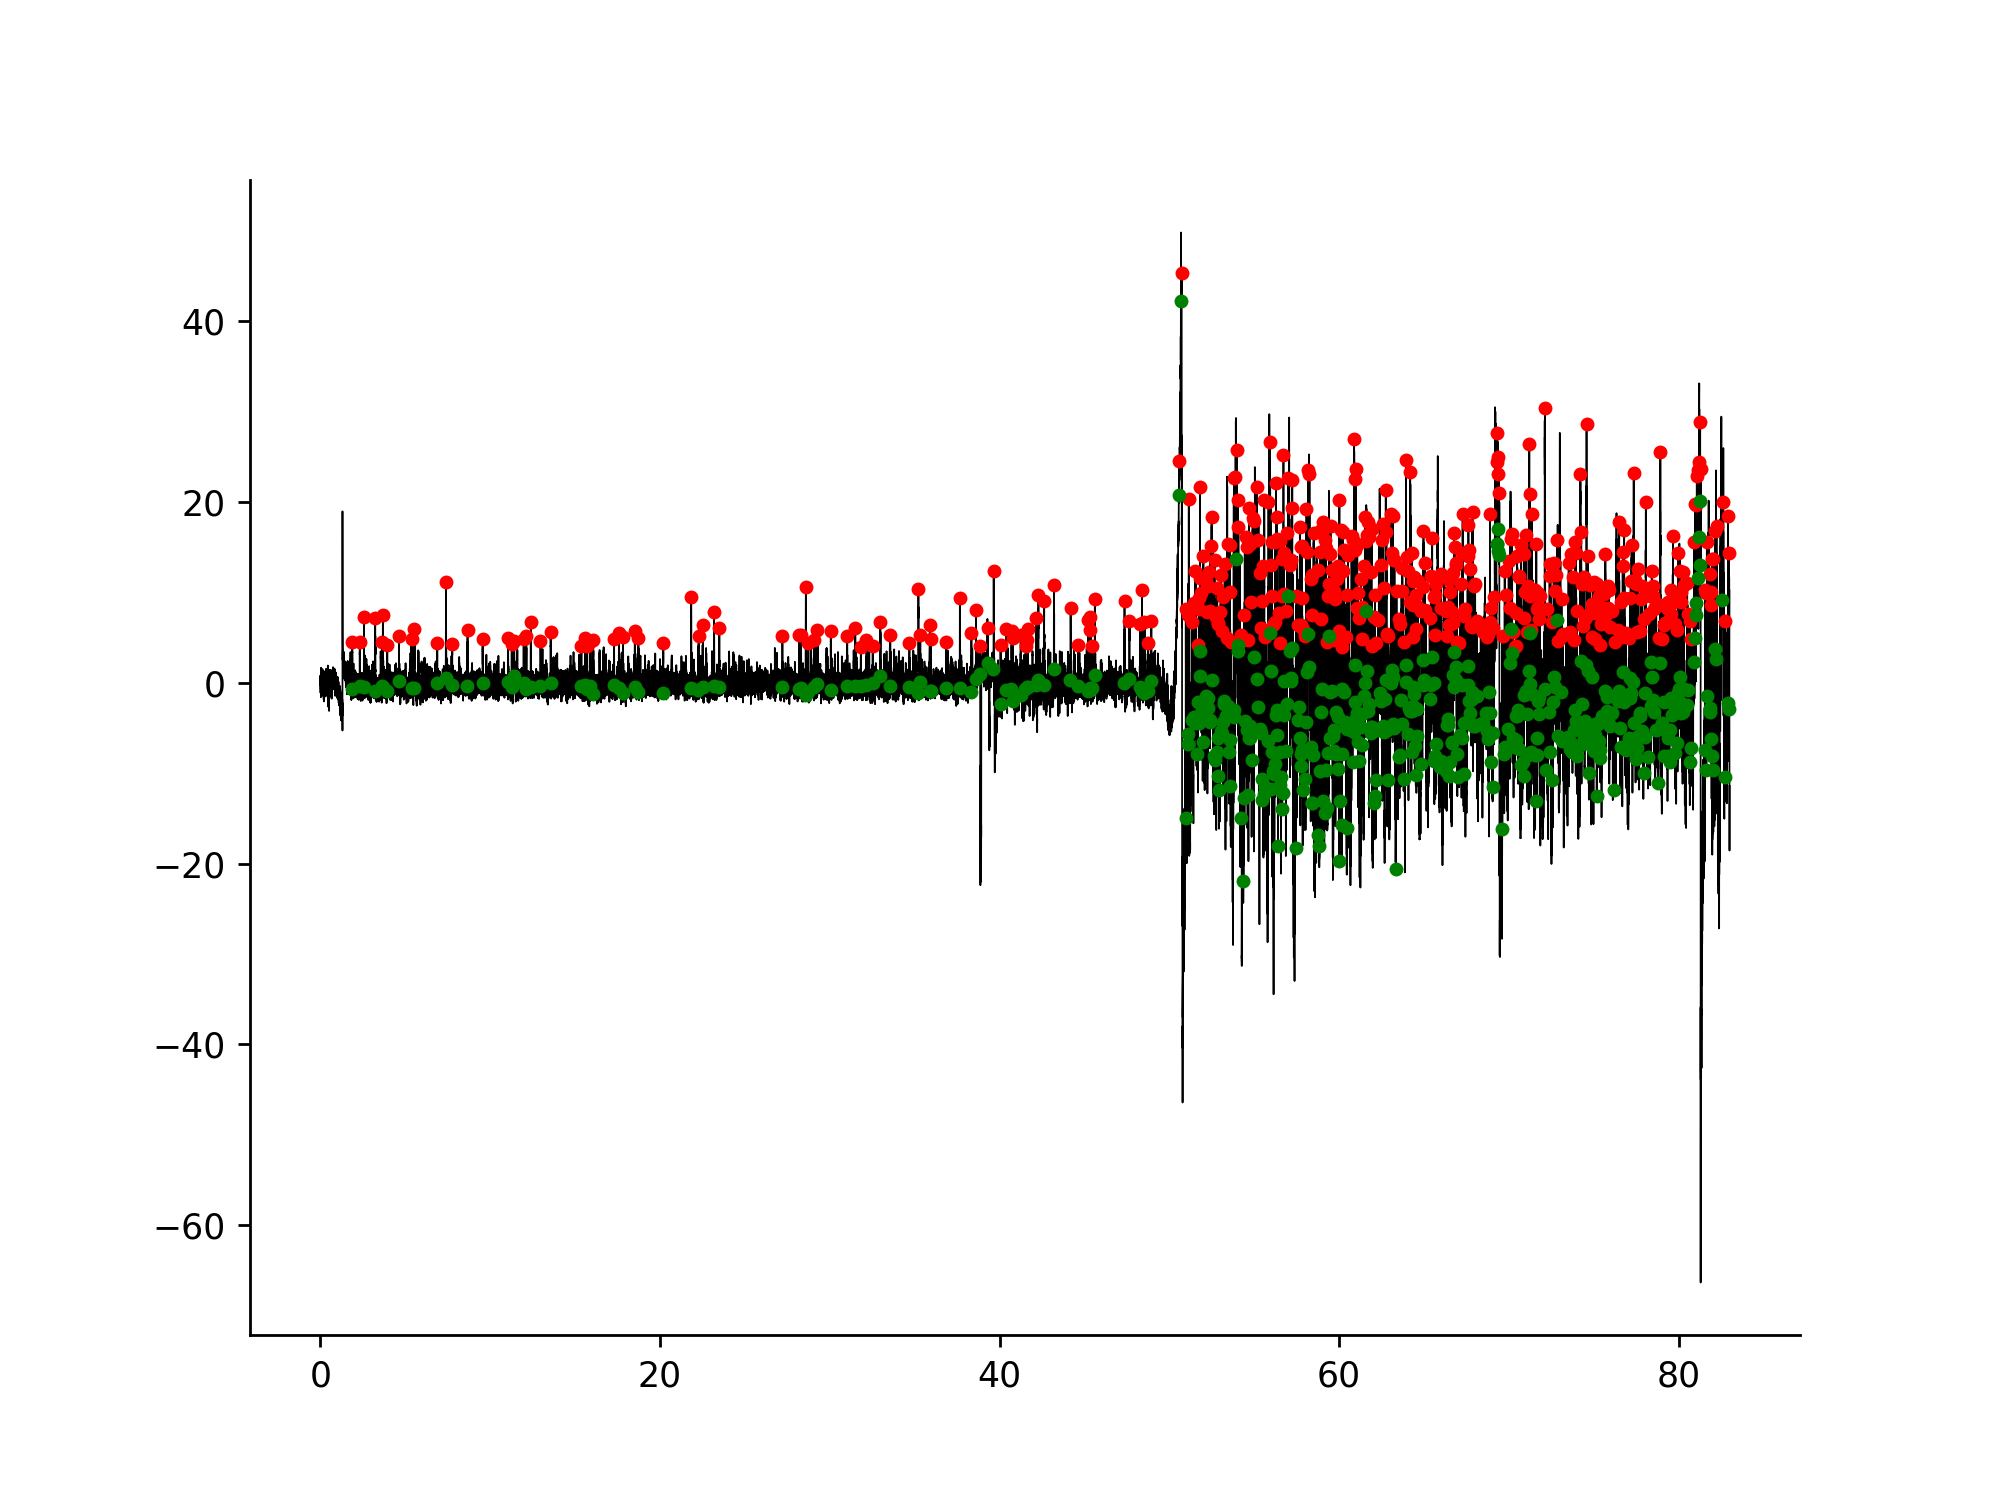

In [4]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 1, figsize=(8, 6))

axs.plot(ba2.sweepX, ba2.sweepY_filtered, 'k', linewidth=0.5)

df = ba2.analysisDf
axs.plot(df['peak_sec'], df['peak_val'], '.r')
axs.plot(df['foot_sec'], df['foot_val'], '.g')

## Test a folder of analysis

In [5]:
path = '/media/cudmore/data/colin'
path = '/Users/cudmore/data/colin'
#path = '/media/cudmore/data/Laura-data/manuscript-data'
ca2 = colinAnalysis2(path)
display(ca2.asDataFrame())

,File,Sweeps,Dur(s),kHz,Start(s),Stop(s),Threshold,Peaks
0,21n10003.abf,1,82.9999,10,0,82.9999,4,None
1,21n10007.abf,1,82.9999,10,0,82.9999,4,None
2,21n10008.abf,1,82.9999,10,0,82.9999,4,None
3,21n19004-ko.abf,1,112.2815,10,0,112.2815,4,None
4,21n19006-ko.abf,1,195.5327,10,0,195.5327,4,None
5,21n22000.abf,1,93.0815,10,0,93.0815,4,None
6,21n23004-ko.abf,1,64.6655,10,0,64.6655,4,None


In [9]:
# read from xls
path = '/media/cudmore/data/colin/cell_db.xls'
path = '/Users/cudmore/data/colin/cell_db.xls'
dfLoaded = pd.read_excel(path, index_col=None, skiprows=1, engine='xlrd')
display(dfLoaded)

,Unnamed: 0,File,animal number,cell number,sex,genotype,age (pnd),recording dur (sec),start(s),stop(s),V_cmd,threshold (pA)
0,NaN,21n10003,1,1,m,wt,NaN,83.00,1.312,49.0000,-40,5
1,NaN,21n10007,2,2,m,wt,NaN,83.00,1.312,81.2870,-40,5
2,NaN,21n10008,3,3,m,wt,NaN,83.00,1.312,83.0000,-40,5
3,NaN,21n19004-ko,4,4,f,ko,NaN,112.28,0.000,50.0000,-30,6
4,NaN,21n19006-ko,5,5,f,ko,NaN,195.53,0.000,55.0000,-30,6
5,NaN,21n22000,6,6,m,wt,NaN,93.08,0.000,93.0815,0,40
6,NaN,21n23004-ko,7,7,f,ko,NaN,64.67,0.000,64.6600,0,20


In [10]:
# analyse all (SLOW)
for ba in ca2:
    # filename in table is without extension
    fileName = ba.fileName
    fileName = os.path.splitext(fileName)[0]
    
    detectionDict = bAnalysis2.getDefaultDetection()
    
    # laura data
    if 0:
        detectionDict['threshold'] = -10
        detectionDict['doBaseline'] = False
        detectionDict['preFootMs'] = 20
        detectionDict['distance'] = 100*10  # minimum number of points between peaks
        detectionDict['wlen'] = 200*10
        detectionDict['fullWidthFraction'] = 0.6
    
    dfRow = dfLoaded[ dfLoaded['File']==fileName ]
    if len(dfRow) == 1:
        display(dfRow)

        detectionDict['genotype'] = dfRow['genotype'].values[0]
        detectionDict['sex'] = dfRow['sex'].values[0]

        detectionDict['threshold'] = dfRow['threshold (pA)'].values[0]  # User specified, CRITICAL

        #detectionDict['xRange'] = [dfRow['start (sec)'].values[0], dfRow['stop (sec)'].values[0]] 
        detectionDict['startSec'] = dfRow['start(s)'].values[0]
        detectionDict['stopSec'] = dfRow['stop(s)'].values[0]

    ba.detect(detectionDict)

    print('  ', ba)


,Unnamed: 0,File,animal number,cell number,sex,genotype,age (pnd),recording dur (sec),start(s),stop(s),V_cmd,threshold (pA)
0,NaN,21n10003,1,1,m,wt,NaN,83.0,1.312,49.0,-40,5


PERFORMING BASELINE
   21n10003.abf sweeps:1 dur(s):83.0 kHz:10 events:57


,Unnamed: 0,File,animal number,cell number,sex,genotype,age (pnd),recording dur (sec),start(s),stop(s),V_cmd,threshold (pA)
1,NaN,21n10007,2,2,m,wt,NaN,83.0,1.312,81.287,-40,5


PERFORMING BASELINE
   21n10007.abf sweeps:1 dur(s):83.0 kHz:10 events:62


,Unnamed: 0,File,animal number,cell number,sex,genotype,age (pnd),recording dur (sec),start(s),stop(s),V_cmd,threshold (pA)
2,NaN,21n10008,3,3,m,wt,NaN,83.0,1.312,83.0,-40,5


PERFORMING BASELINE
   21n10008.abf sweeps:1 dur(s):83.0 kHz:10 events:80


,Unnamed: 0,File,animal number,cell number,sex,genotype,age (pnd),recording dur (sec),start(s),stop(s),V_cmd,threshold (pA)
3,NaN,21n19004-ko,4,4,f,ko,NaN,112.28,0.0,50.0,-30,6


PERFORMING BASELINE
   21n19004-ko.abf sweeps:1 dur(s):112.28 kHz:10 events:22


,Unnamed: 0,File,animal number,cell number,sex,genotype,age (pnd),recording dur (sec),start(s),stop(s),V_cmd,threshold (pA)
4,NaN,21n19006-ko,5,5,f,ko,NaN,195.53,0.0,55.0,-30,6


PERFORMING BASELINE
   21n19006-ko.abf sweeps:1 dur(s):195.53 kHz:10 events:124


,Unnamed: 0,File,animal number,cell number,sex,genotype,age (pnd),recording dur (sec),start(s),stop(s),V_cmd,threshold (pA)
5,NaN,21n22000,6,6,m,wt,NaN,93.08,0.0,93.0815,0,40


PERFORMING BASELINE
   21n22000.abf sweeps:1 dur(s):93.08 kHz:10 events:69


,Unnamed: 0,File,animal number,cell number,sex,genotype,age (pnd),recording dur (sec),start(s),stop(s),V_cmd,threshold (pA)
6,NaN,21n23004-ko,7,7,f,ko,NaN,64.67,0.0,64.66,0,20


PERFORMING BASELINE
   21n23004-ko.abf sweeps:1 dur(s):64.67 kHz:10 events:11


In [11]:
display(ca2.asDataFrame())

,File,Sweeps,Dur(s),kHz,Start(s),Stop(s),Threshold,Peaks
0,21n10003.abf,1,82.9999,10,1.312,49.0000,5,57
1,21n10007.abf,1,82.9999,10,1.312,81.2870,5,62
2,21n10008.abf,1,82.9999,10,1.312,83.0000,5,80
3,21n19004-ko.abf,1,112.2815,10,0.000,50.0000,6,22
4,21n19006-ko.abf,1,195.5327,10,0.000,55.0000,6,124
5,21n22000.abf,1,93.0815,10,0.000,93.0815,40,69
6,21n23004-ko.abf,1,64.6655,10,0.000,64.6600,20,11


<IPython.core.display.Javascript object>


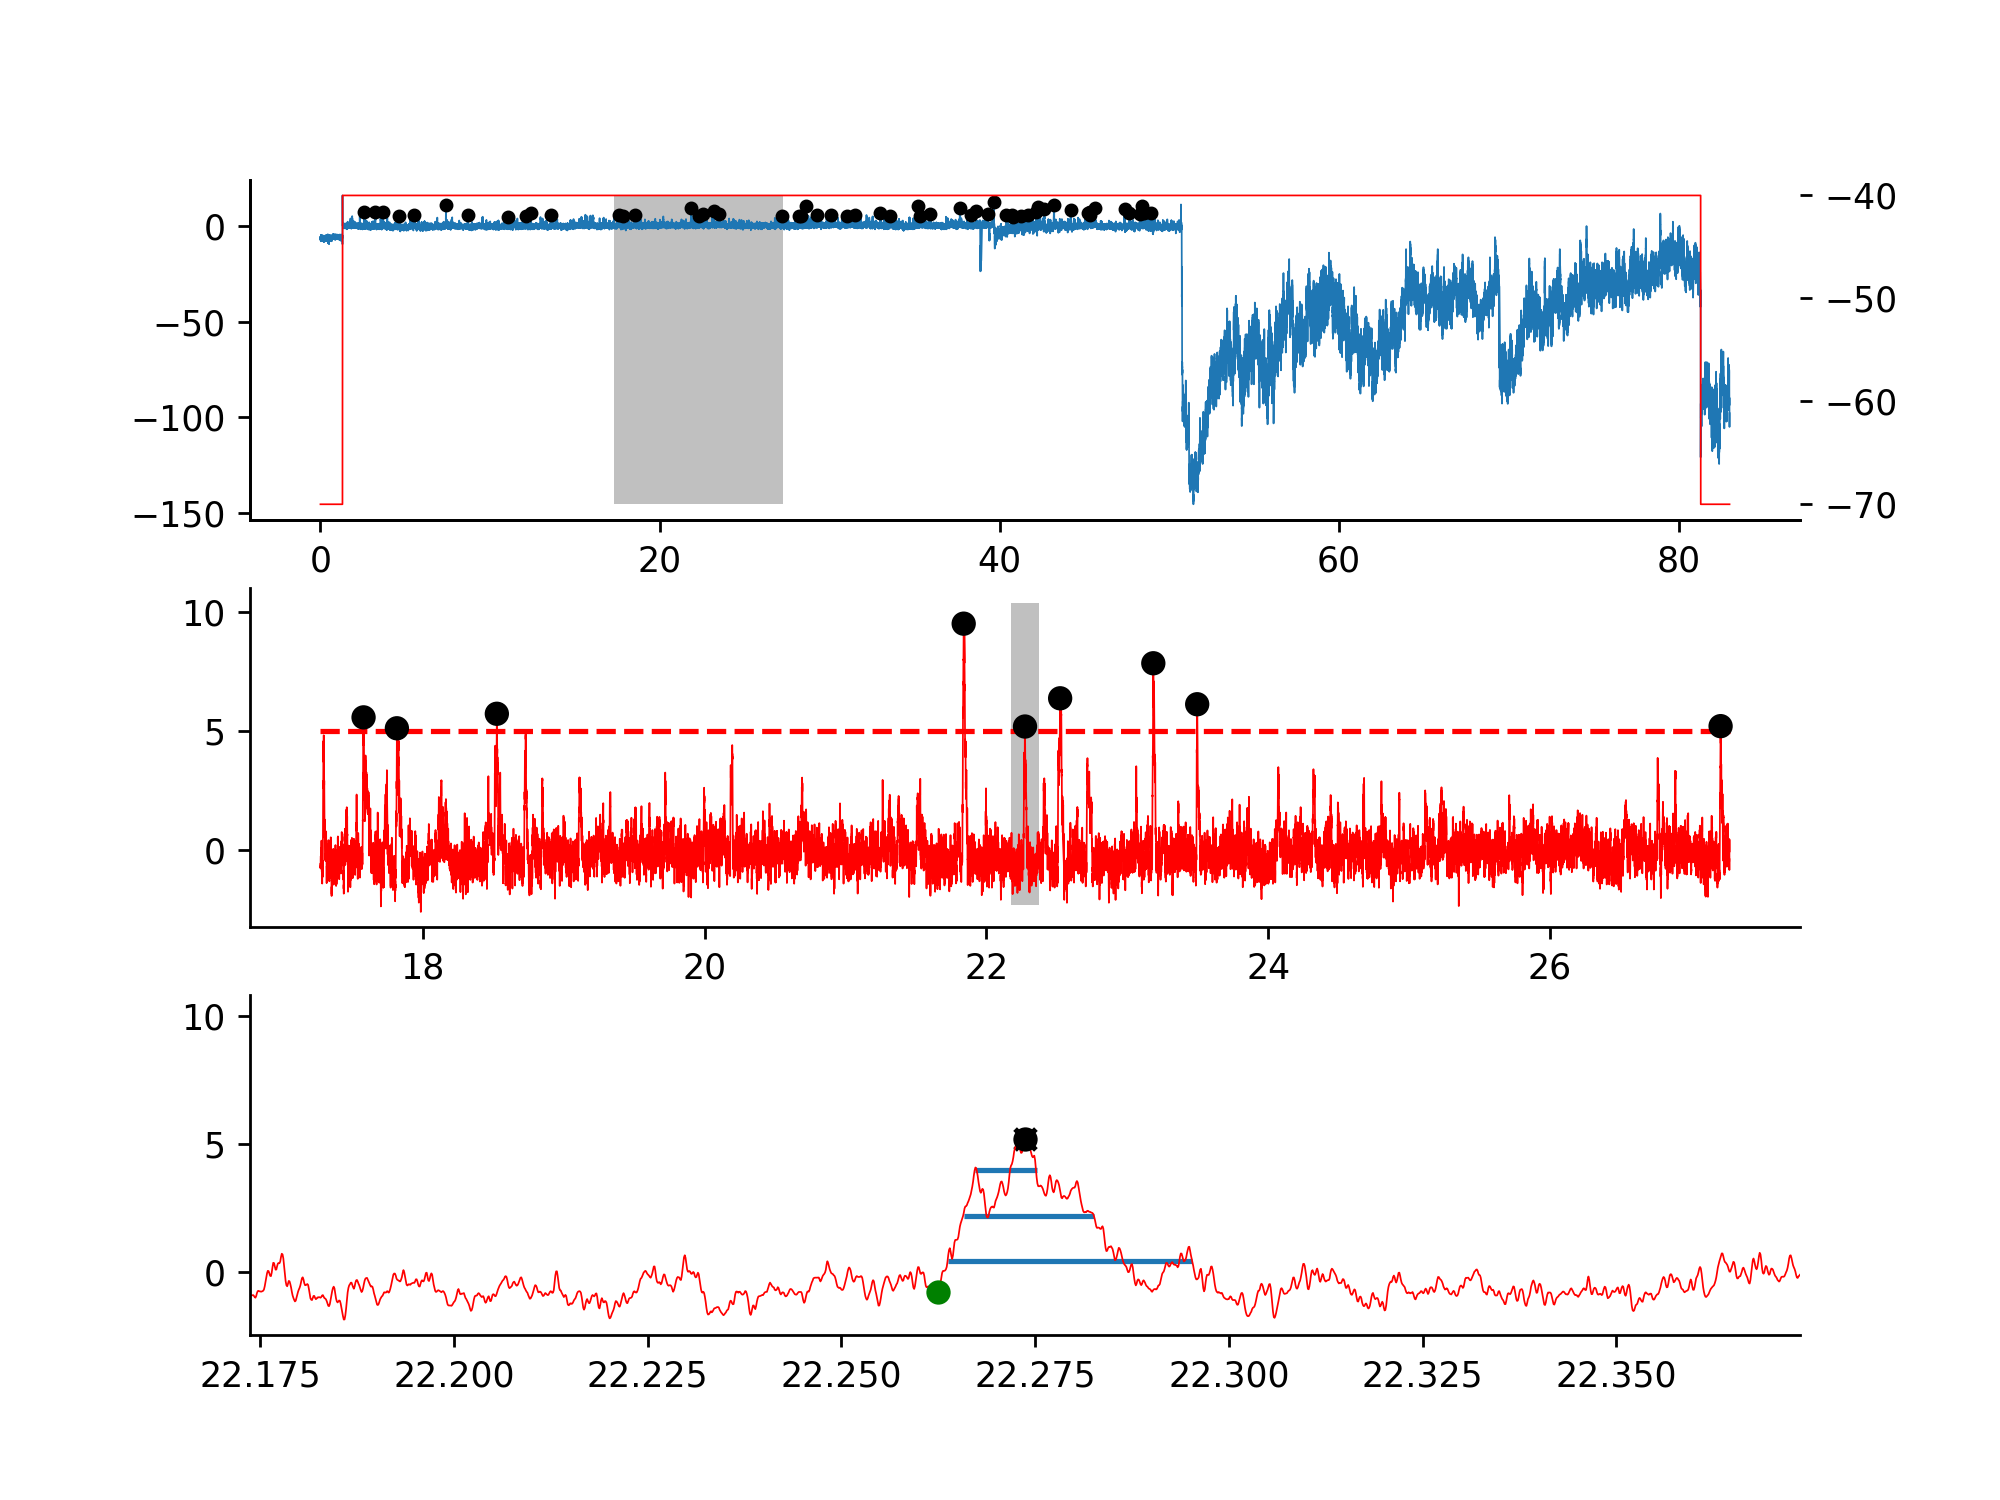

In [12]:
from colinDataBrowser import colinDataBrowser

cdb = colinDataBrowser(ca2)

<IPython.core.display.Javascript object>


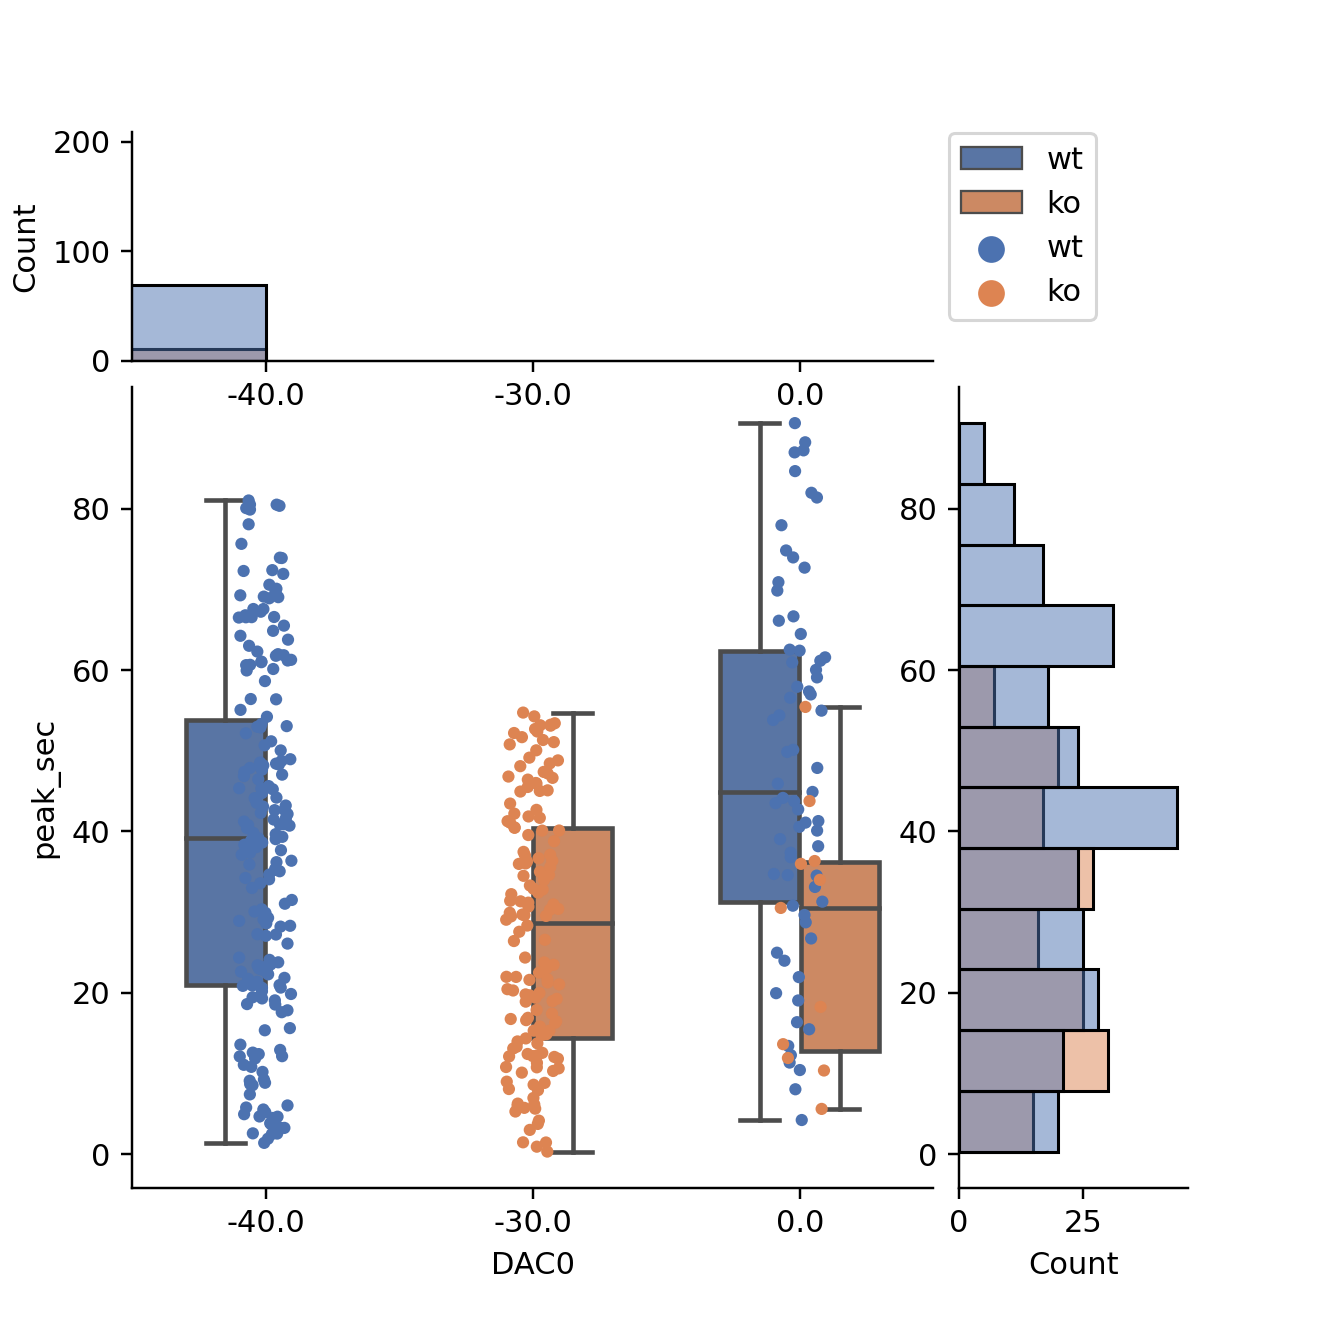

In [14]:
# display scatter
from myScatterWidget import myScatterWidget

df = ca2.getAllDataFrame()
statList = bAnalysis2.getStatList()

msw = myScatterWidget(df, statList=statList, hueCols=['genotype', 'sex', 'file', 'file_idx', 'DAC0'])

# laura
#msw = myScatterWidget(df, statList=statList, hueCols=['file', 'file_idx', 'DAC0'])


In [15]:
# test iter
for file in ca2:
    print(file)
    

21n10003.abf sweeps:1 dur(s):83.0 kHz:10 events:57
21n10007.abf sweeps:1 dur(s):83.0 kHz:10 events:62
21n10008.abf sweeps:1 dur(s):83.0 kHz:10 events:80
21n19004-ko.abf sweeps:1 dur(s):112.28 kHz:10 events:22
21n19006-ko.abf sweeps:1 dur(s):195.53 kHz:10 events:124
21n22000.abf sweeps:1 dur(s):93.08 kHz:10 events:69
21n23004-ko.abf sweeps:1 dur(s):64.67 kHz:10 events:11
